In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def make_df(filename: str):
    df  = pd.read_csv(filename)
    df.loc[:, "nspecies"] = 1
    df.loc[df.model.isin(["00030", "00031"]), "nspecies"] = 2
    df.loc[:, "ntest"] = df.nspecies * 100
    df.loc[:, "total_pass"] = df.ntest - (df["test0"] + df["test1"] + df["test2"] + df["test3"])
    df.loc[df["total_pass"] > df.ntest, "total_pass"] = 0
    return df

In [3]:
pyssa_results = make_df("../results/pyssa_results.csv")
tellurium_results = make_df("../results/Tellurium_results.csv")
biosimulator_results = make_df("../results/BioSimulator_results.csv")
gillespiessa_results = make_df("../results/GillespieSSA_results.csv")

In [4]:
results = pd.concat([pyssa_results, tellurium_results, biosimulator_results, gillespiessa_results])
results

,model,lib,algo,nrep,test0,test1,test2,test3,nspecies,ntest,total_pass
0,1,pyssa,direct,10000,0,0,0,0,1,100,100
1,1,pyssa,tau_leaping,10000,0,0,0,0,1,100,100
2,1,pyssa,tau_adaptive,10000,0,0,0,0,1,100,100
3,3,pyssa,direct,10000,0,0,0,7,1,100,93
4,3,pyssa,tau_leaping,10000,0,0,8,0,1,100,92
...,...,...,...,...,...,...,...,...,...,...,...
23,37,GillespieSSA,tau_adaptive,10000,50,0,50,0,1,100,0
24,38,GillespieSSA,tau_leaping,10000,50,0,50,0,1,100,0
25,38,GillespieSSA,tau_adaptive,10000,50,0,50,0,1,100,0
26,39,GillespieSSA,tau_leaping,10000,50,0,50,0,1,100,0


In [5]:
# TODO: Make it easy to distinguish between pass and fail
def plot_pass_bars(df, hue="algo"):
    plt.figure(figsize=(14,5))
    g = sns.barplot(x="model", y="total_pass", hue=hue, data=df)
    for p in g.patches:
        if np.isnan(p.get_height()):
            continue
        height = int(p.get_height())
        if height == 100:
            color = "green"
        else:
            color = "red"
        g.annotate(f"{height}", (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=8, color=color, xytext=(0, 10),
        textcoords='offset points')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fancybox=True, shadow=True)
    plt.ylim(0,120)
#     plt.axhline(200)

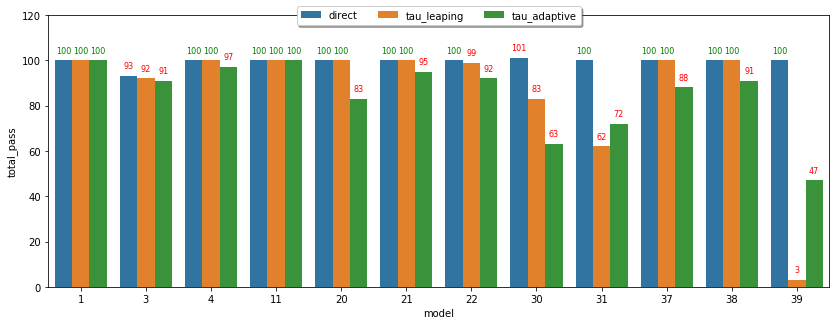

In [6]:
plot_pass_bars(results[results.lib == "pyssa"])

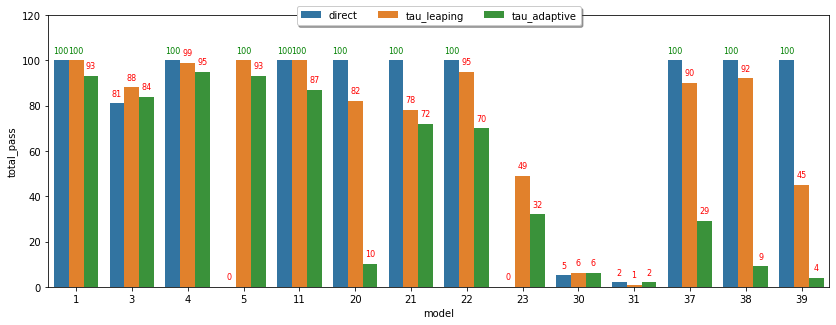

In [7]:
plot_pass_bars(results[results.lib == "BioSimulator"])

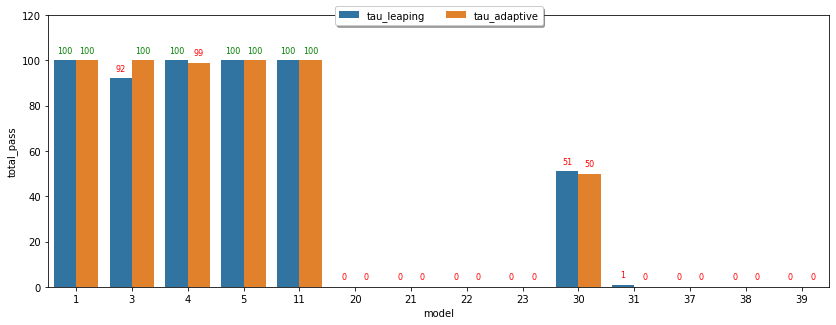

In [8]:
plot_pass_bars(results[results.lib == "GillespieSSA"]) # tau = 0.1

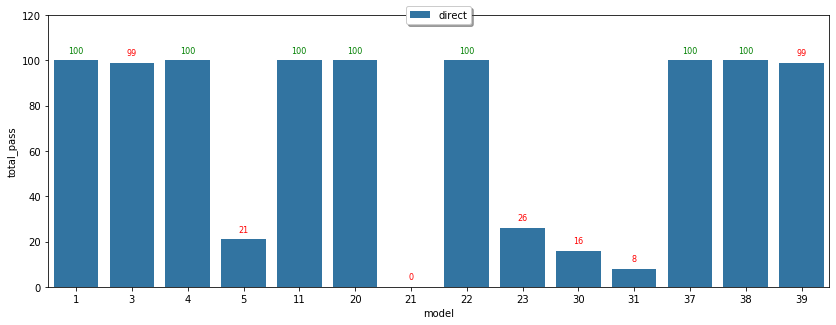

In [9]:
plot_pass_bars(results[results.lib == "Tellurium"])

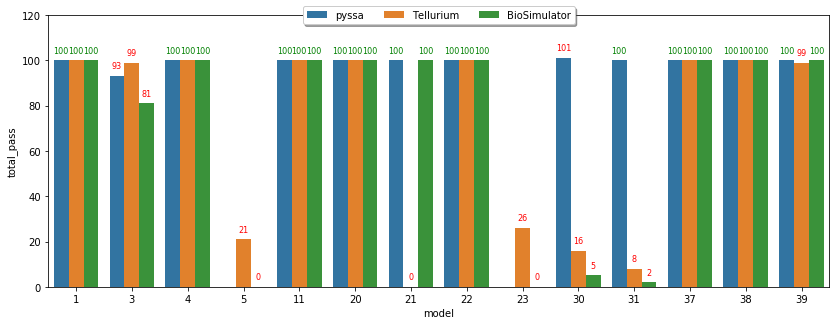

In [10]:
plot_pass_bars(results[results.algo == "direct"], hue="lib")

Model | Fail | Reason
---|---|---
00001 | No | n/a
00003 | Yes, all | Even the C library says it will fail
00004 | No | n/a
00005 | Yes, all | Takes too long to run
00011, 00020 | No | n/a
00021 | Yes, Tellurium | ? - look at plot
00022 | No | n/a
00023 | Yes, all | Takes too long to run
00030-00031 | Yes, Tellurium | ? - pyssa, biosimulator should work, tellurim probably fail because 2nd order
00037-00038 | No | n/a
00039 | Yes, Tellurium | ? - look at plot


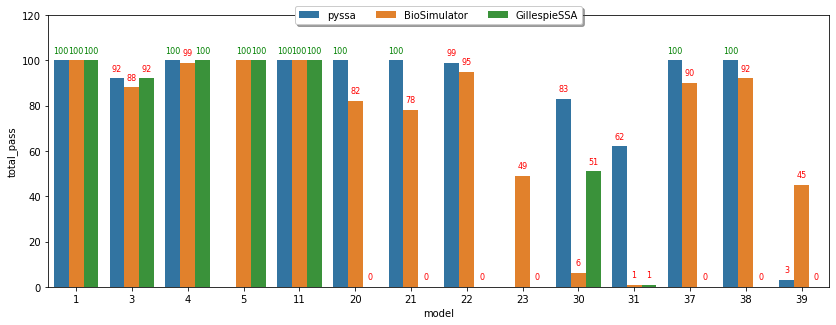

In [11]:
plot_pass_bars(results[results.algo == "tau_leaping"], hue="lib")

Model | Fail | Reason
---|---|---
00001 | No | n/a
00003 | Yes, all | Even the C library says it will fail
00004 | Yes, Tellurium | Only one, look at plot
00005 | Yes, pyssa | Need to **rerun** `pyssa`
00011 | No | n/a
00020 | Yes, Biosimulator and GillespieSSA | Gillespie fails because of 0 species, why Biosimulator?
00021 | Yes, Biosimulator and GillespieSSA | Gillespie fails because of 0 species, why Biosimulator?
00022 | Yes, all | GillespieSSA fails because of 0 species, why Biosimulator and pyssa? Look at plot
00023 | Yes, all | GillespieSSA fails because of 0 species. Need to **rerun** `pyssa`
00030-00031 | Yes, all | ? - Look at all plots carefully, probably to do with wrong accuracy tests and model was also wrong.
00037-00038 | Yes, GillespieSSA and Biosimulator |? - Look at all plots
00039 | Yes, all | ? - Look at all plots

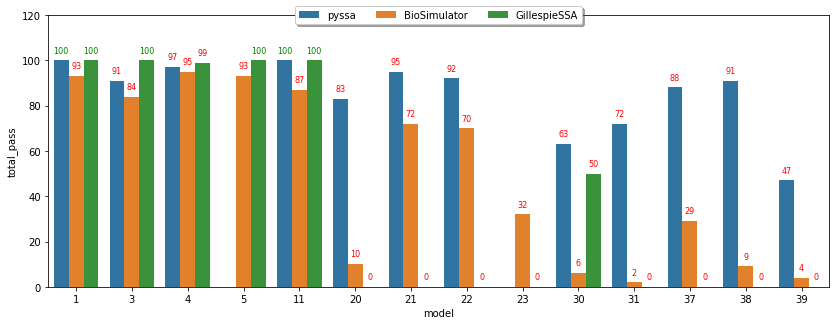

In [12]:
plot_pass_bars(results[results.algo == "tau_adaptive"], hue="lib")

## Biosimulator fails everything

Model | Fail | Reason
---|---|---
00001 | Yes, Biosimulator | ? - Look at plot
00003 | Yes, `pyssa` and Biosimulator | ? - Even the C library says it will fail, but look at plots
00004 | Yes, all | ? - Look at plot
00005 | Yes, pyssa and Biosimulator | Need to **rerun** `pyssa`, plot Biosimulator
00011 | Yes Biosimulator | ? plot Biosimulator
00020 | Yes, all | Gillespie fails because of 0 species. Why BioSimulator, why pyssa?
00021 | Yes, all | Gillespie fails because of 0 species. Why BioSimulator, why pyssa?
00022 | Yes, all | Gillespie fails because of 0 species. Why BioSimulator, why pyssa?
00023 | Yes, all | GillespieSSA fails because of 0 species. Why BioSmulator, Need to **rerun** `pyssa`
00030-00031 | Yes, all | ? - Look at all plots carefully, probably to do with wrong accuracy tests and model was also wrong. Why did GillespieSSA fail, **rerun** ? Check model
00037-00038 | Yes, all |? - Look at all plots. Why did GillespieSSA fail, **rerun** ? Check model
00039 | Yes, all | ? - Look at all plots. Why did GillespieSSA fail, **rerun** ? Check model